<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/practicasregresionlasso_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la PrÃ¡ctica: RegresiÃ³n Lasso y Ridge**

#### **ðŸ“Œ Objetivos de la PrÃ¡ctica:**  
Al finalizar esta prÃ¡ctica, los estudiantes serÃ¡n capaces de:  
1. **Realizar un AnÃ¡lisis Exploratorio de Datos (EDA)** completo, incluyendo visualizaciÃ³n de distribuciones, detecciÃ³n de outliers y anÃ¡lisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categÃ³ricas y escalando caracterÃ­sticas.  
3. **Implementar modelos de regresiÃ³n Lasso y Ridge**, entendiendo cÃ³mo la regularizaciÃ³n afecta los coeficientes.  
4. **Verificar los supuestos de la regresiÃ³n lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar quÃ© variables son mÃ¡s relevantes en cada caso.  

---

### **ðŸ“Œ Entrega de la PrÃ¡ctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

ðŸŽ¯ **Criterios de EvaluaciÃ³n:**  
âœ” **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
âœ” **AnÃ¡lisis visual y estadÃ­stico** (grÃ¡ficos claros, interpretaciÃ³n de resultados).  
âœ” **ValidaciÃ³n de supuestos** (justificaciÃ³n de si se cumplen o no).  
âœ” **ComparaciÃ³n crÃ­tica** entre Lasso y Ridge.  



---


#### **ðŸ”¹ Paso 1: ConfiguraciÃ³n Inicial**
âœ… Carga el set de datos que puedes encontrar en el campus virtual

âœ… Ejecutar las celdas de importaciÃ³n de librerÃ­as y carga del dataset.  
âœ… Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ClassFiles/insurance.csv")
print("Primeras lineas del archivo: \n" , df.head())
print(df.info())
print("\nAnalisis estadistico del dataset \n", df.describe())

Primeras lineas del archivo: 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Analisis estadistico del dataset 
                age      

#### **ðŸ”¹ Paso 2: AnÃ¡lisis Exploratorio (EDA)**  
ðŸ“Š **Para variables numÃ©ricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersiÃ³n.  

ðŸ“Š **Para variables categÃ³ricas:**  
- Usar grÃ¡ficos de barras para visualizar frecuencias.   

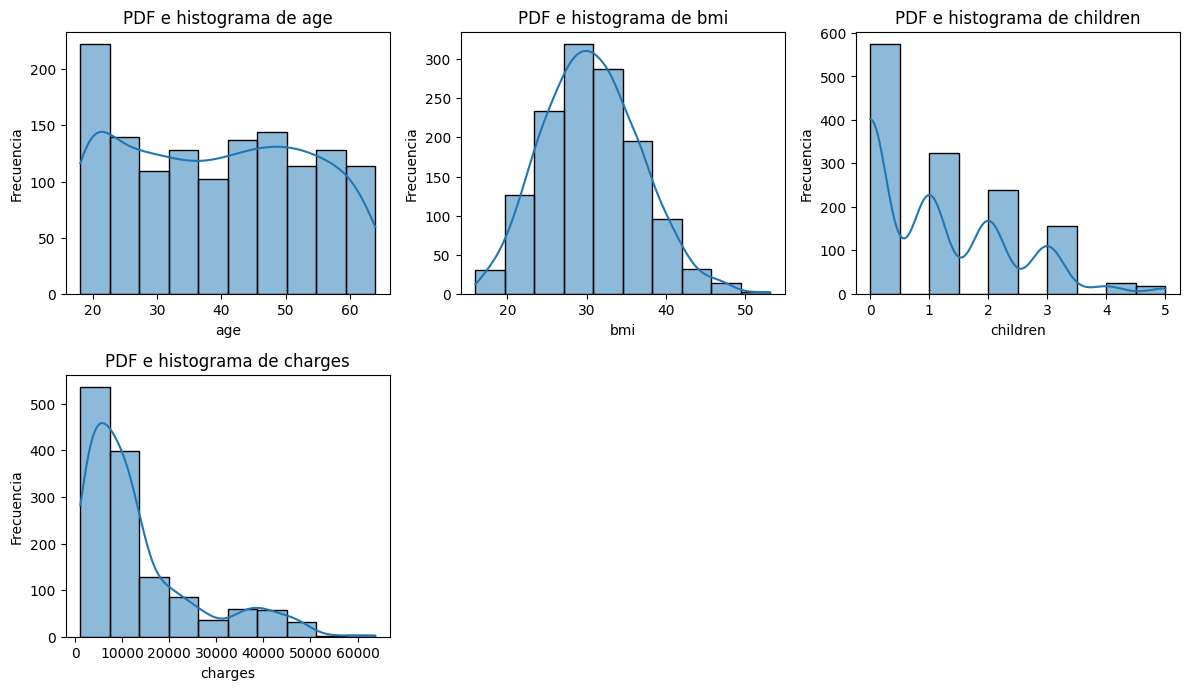

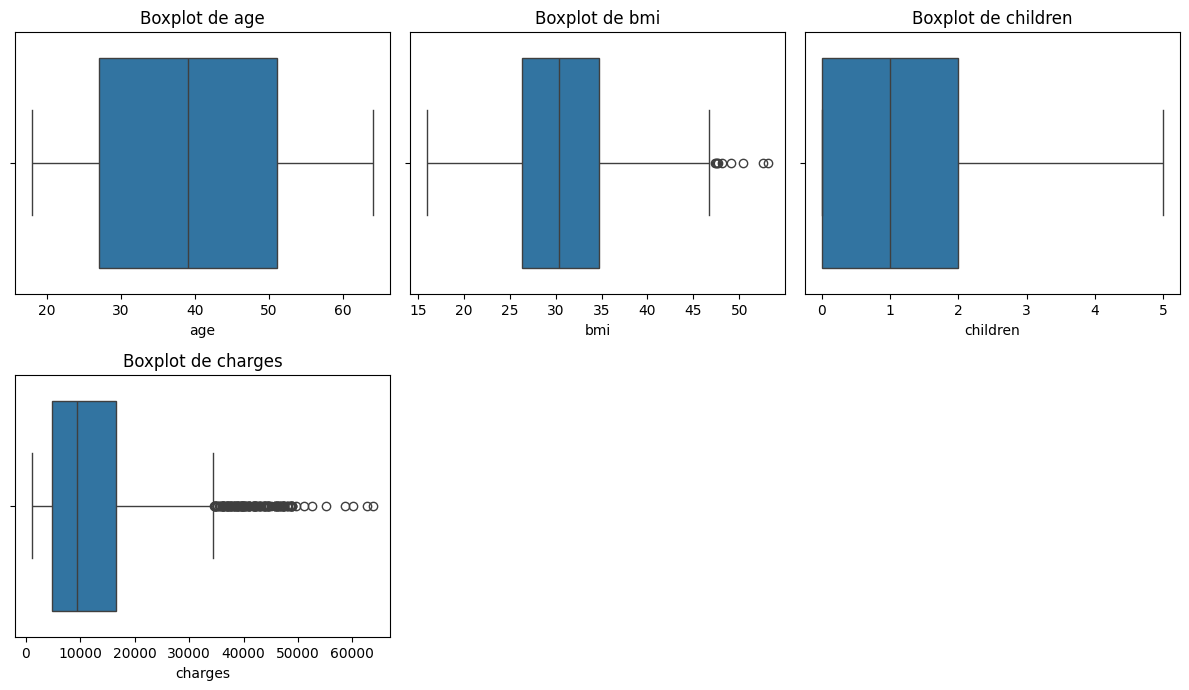

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12,10))
for i,col in enumerate(numerical_columns,1):
  plt.subplot(3,3,i)
  sns.histplot(df[col], kde=True, bins=10)
  plt.title(f'PDF e histograma de {col}', fontsize=12)
  plt.xlabel(col, fontsize=10)
  plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,10))
for i,col in enumerate(numerical_columns,1):
  plt.subplot(3,3,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot de {col}', fontsize=12)
  plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

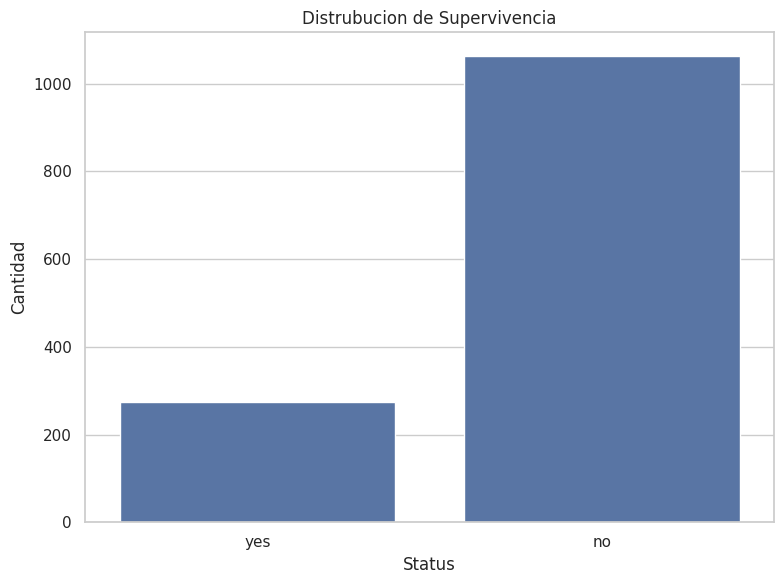

In [14]:
# Configurar el estilo de los grÃ¡ficos
sns.set(style="whitegrid")

# Crear grÃ¡ficas de barras para cada variable categÃ³rica
plt.figure(figsize=(8, 6))

# GrÃ¡fica de barras para 'cut'
sns.countplot(x='smoker', data=df)
plt.title('Distrubucion de Supervivencia')
plt.xlabel('Status')
plt.ylabel('Cantidad')


# Ajustar el layout y mostrar los grÃ¡ficos
plt.tight_layout()
plt.show()

#### **ðŸ”¹ Paso 3: Matriz de CorrelaciÃ³n**  
âœ… Calcular la matriz de correlaciÃ³n **solo para variables numÃ©ricas**.  
âœ… Generar un **mapa de calor** para visualizar relaciones.  
ðŸ“Œ **Pregunta:** Â¿QuÃ© variables estÃ¡n mÃ¡s correlacionadas con el target (`charges`)? (salida del dataset)  


#### **ðŸ”¹ Paso 4: Preprocesamiento**  
ðŸ”§ **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categÃ³ricas con `OneHotEncoder`.  
3. Estandarizar variables numÃ©ricas con `StandardScaler`.  
âœ… Verificar que el dataset transformado no tenga valores nulos.  

#### **ðŸ”¹ Paso 5: Modelado (Lasso y Ridge)**  
ðŸŽ¯ **Para cada modelo:**  
1. Ajustar el modelo con los hiperparÃ¡metros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **RÂ²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

ðŸ“Œ **Pregunta:**  
- Â¿QuÃ© modelo tiene un mejor RÂ²? Â¿Por quÃ© crees que ocurre esto?  
- Â¿QuÃ© variables tienen coeficientes cercanos a cero en Lasso? Â¿Por quÃ©?  

#### **ðŸ”¹ Paso 6: VerificaciÃ³n de Supuestos**  
ðŸ“‰ **Para cada modelo, verificar:**  
1. **Linealidad** (grÃ¡fico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

ðŸ“Œ **Pregunta:**  
- Â¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, Â¿cÃ³mo podrÃ­a solucionarse?  

#### **ðŸ”¹ Paso 7: ComparaciÃ³n Final**  
ðŸ“Š **Analizar:**  
- Â¿QuÃ© modelo es mÃ¡s interpretable?  
- Â¿CuÃ¡l reduce mejor el sobreajuste?  
- Â¿QuÃ© variables son mÃ¡s importantes en cada caso?  
